## **Introduction to Image Processing**

## Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image



Pretty printing has been turned OFF


### ** Resizing an image size using different interpolation functions**

**1. ** Resize the lena or vibot image using nearest, bilinear and bicubic function.

You can define your function which accept the model and resize size from the user or just run a script.

NOW PRINTING THE ORIGINAL IMAGES NEEDED LATER


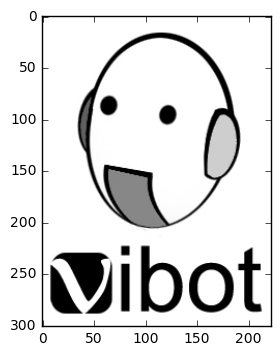

(301, 222)
[[ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


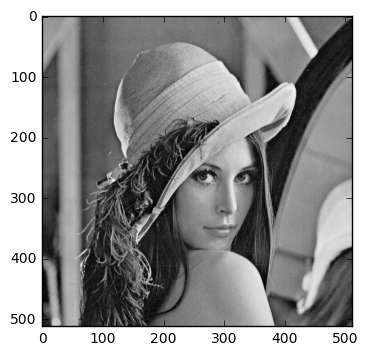

(512, 512)
[[162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 [162 162 162 ..., 170 155 128]
 ..., 
 [ 43  43  50 ..., 104 100  98]
 [ 44  44  55 ..., 104 105 108]
 [ 44  44  55 ..., 104 105 108]]


In [2]:
#The comments are either unsuccesful tryings or optional things, normally plottings of intermediate images
#for me to check that i am going in the good way

Path = './images/'
image_name = 'vibot-color.jpg'
vibot_im = io.imread(Path.__add__(image_name), as_grey=True)
plt.figure
plt.imshow(vibot_im, cmap=plt.cm.gray)
plt.show()
print (vibot_im.shape)
print (vibot_im)


Path = './images/'
image_name = 'lena-grey.bmp'
lena_im = io.imread(Path.__add__(image_name))
plt.figure
plt.imshow(lena_im, cmap=plt.cm.gray)
plt.show()
print (lena_im.shape)
print (lena_im)

Bilinear


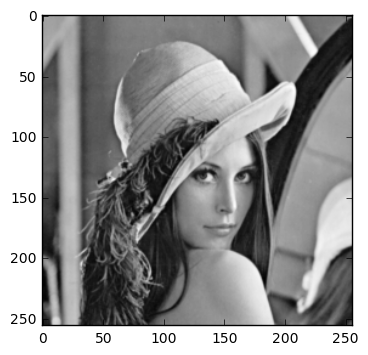

(256, 256)
Nearest


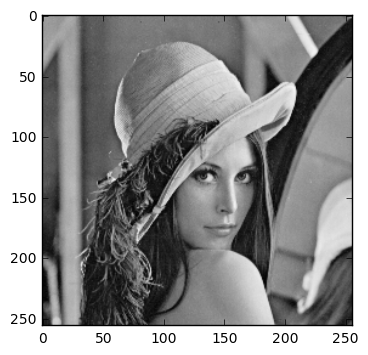

Bicubic


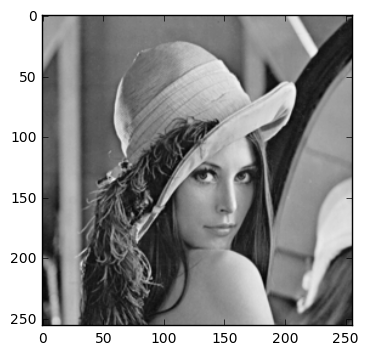

Nearest vibot grey resized (to work with it later)


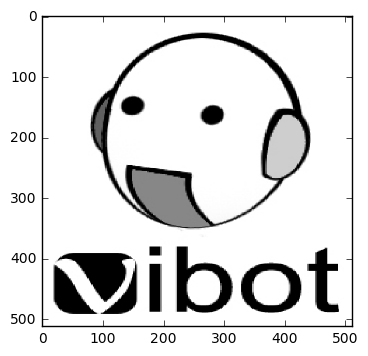

In [3]:
print ('Bilinear')
lena_resized = misc.imresize(lena_im,(256,256) , interp='bilinear',mode = None)
plt.figure
plt.imshow(lena_resized, cmap=plt.cm.gray)
plt.show() 
print (lena_resized.shape)

print ('Nearest')
lena_resized = misc.imresize(lena_im,(256,256) , interp='nearest',mode = None)
plt.figure
plt.imshow(lena_resized, cmap=plt.cm.gray)
plt.show() 

print ('Bicubic')
lena_resized = misc.imresize(lena_im,(256,256) , interp='bicubic',mode = None)
plt.figure
plt.imshow(lena_resized, cmap=plt.cm.gray)
plt.show() 


#RESIZING VIBOT GREY IMAGE
print ('Nearest vibot grey resized (to work with it later)')
vibot_grey_resized = misc.imresize(vibot_im,(512,512) , interp='nearest',mode = None)
plt.figure
plt.imshow(vibot_grey_resized, cmap=plt.cm.gray)
plt.show() 

#print ('Nearest mask resized (to work with it later)')
#mask_resized = misc.imresize(mask_im,(512,512) , interp='nearest',mode = None)
#plt.figure
#plt.imshow(mask_resized, cmap=plt.cm.gray)
#plt.show() 

**2. ** Similar to the function of `my_blending.m` that you saw before define your function of blending.

Blend the lena image and vibot image using simple, alpha and pyramid method.   

Pyramid blending method: 
1. Create a mask the same size as your input images 
2. Create Laplacian pyramid of the input images 
    2.1. Create Gaussian pyramids of the input images
    2.2. Create Laplacian pyramids using the Gaussian pyramids
3. Create Gaussian pyramid for the region mask
4. Blend the two laplacian pyramids using the pyramid of the mask as weigh 
    $$ BL = L_1 * (GM) + L_2 *(1 - GM)$$
5. Colapse the pyramid to get the final image 
    $$rescale(rescale(rescale(BL_3)+BL_2)+BL_1)+BL_0$$

Note : For pyramid blending approach, you can use:
    * transform.rescale for upscaling your images
    * transform.pyramid_gaussian for building your pyramids
    * The output of transform.pyramid_gaussian is a type generator and you need to convert it to a list :
    
        b = [a for a in Gaussian_pyramid]


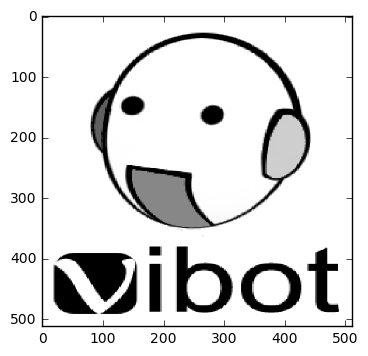

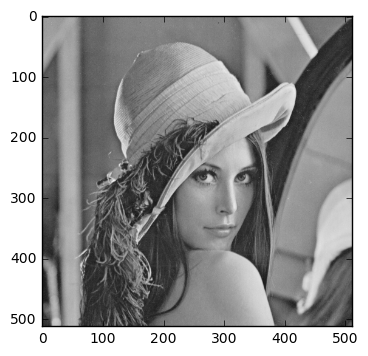

Now simple-blending lena and vibot


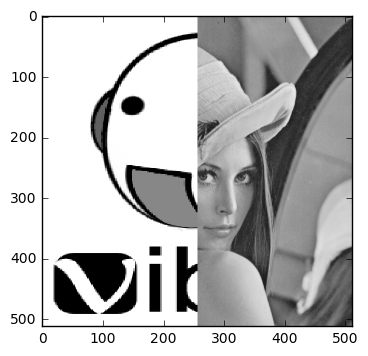

Now alpha-blending original lena image with resized vibot (as_grey) image:


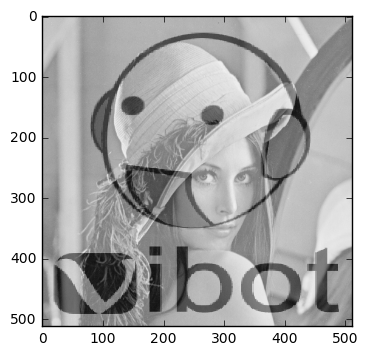

PYRAMID!
Creating the mask:
  
[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 ..., 
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]]
  
  
laplacian pyramid of lena
gaussian pyramid of lena
laplacian pyramid of vibot
gaussian pyramid of vibot
gaussian pyramid of the mask
  


/home/dani/anaconda3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


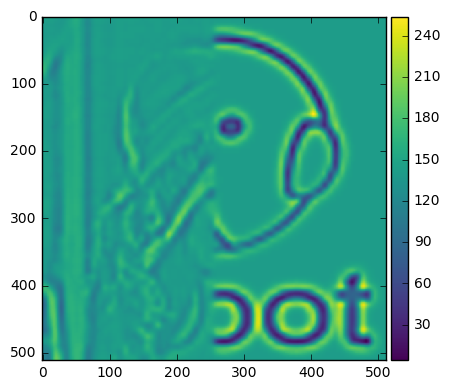

In [26]:
im_vibot = Image.fromarray(vibot_grey_resized, mode='P')
plt.figure
plt.imshow(im_vibot, cmap=plt.cm.gray)
plt.show() 

im_lena = Image.fromarray(lena_im, mode='P')
plt.figure
plt.imshow(im_lena, cmap=plt.cm.gray)
plt.show() 



print ('Now simple-blending lena and vibot')

len_cop = lena_im.copy()
vib_cop = vibot_grey_resized.copy()

len_cop[:,:256]=0
vib_cop[:,256:]=0

#plt.figure()
#io.imshow(len_cop)
#plt.figure()
#io.imshow(vib_cop)

simple_blend_lena_vibot = len_cop + vib_cop
plt.figure()
plt.imshow(simple_blend_lena_vibot, cmap=plt.cm.gray)
plt.show()



print ('Now alpha-blending original lena image with resized vibot (as_grey) image:')
image_blended = Image.blend(im_vibot, im_lena, alpha=0.6)
plt.figure
plt.imshow(image_blended, cmap=plt.cm.gray)
plt.show() 

print('PYRAMID!')
print ('Creating the mask:')
print ('  ')
mask=np.zeros((512,512))
mask[:,:256]=1 #Setting half of the mask to 1 and the other half to 0
print (mask)
mask.size
print('  ')
print('  ')

print('laplacian pyramid of lena')
lena_lap = transform.pyramid_laplacian(im_lena)
lena_lap = list(lena_lap)
#print(lena_lap)
#for im in lena_lap:
#    plt.figure()
#    io.imshow(im)

#one by one plotting
#plt.figure()
#io.imshow(lena_lap[0])
#plt.figure()
#io.imshow(lena_lap[1])
#lena_lap_collapsed=0
#for i in range(0,7):
#    new_lap_rescaled = misc.imresize(lena_lap[i],(512,512) , interp='bicubic',mode = None)
#    lena_lap_collapsed = lena_lap_collapsed + new_lap_rescaled
    
#plt.figure()
#io.imshow(lena_lap_collapsed)

#print('  ')
#print('  ')



print('gaussian pyramid of lena')
lena_gau = transform.pyramid_gaussian(im_lena,downscale=2)
lena_gau = list(lena_gau)
#print(lena_gau)
#for im in lena_gau:
#    plt.figure()
#    io.imshow(im)
#print('  ')
#print('  ')

print('laplacian pyramid of vibot')
vibot_lap = transform.pyramid_laplacian(im_vibot,downscale=2)
vibot_lap = list(vibot_lap)
#print(vibot_lap)
#for im in vibot_lap:
#    plt.figure()
#    io.imshow(im)

#vibot_lap_collapsed=0
#for i in range(0,7):
#    new_lap_rescaled = misc.imresize(vibot_lap[i],(512,512) , interp='bicubic',mode = None)
#    vibot_lap_collapsed = vibot_lap_collapsed + new_lap_rescaled
    
#plt.figure()
#io.imshow(vibot_lap_collapsed)

#print('  ')
#print('  ')

print('gaussian pyramid of vibot')
vibot_gau = transform.pyramid_gaussian(im_vibot,downscale=2)
vibot_gau = list(vibot_gau)
#print(vibot_gau)
#for im in vibot_gau:
#    plt.figure()
#    io.imshow(im)
#print('  ')
#print('  ')

print('gaussian pyramid of the mask')
print('  ')
mask_gau = transform.pyramid_gaussian(mask,downscale=2)
mask_gau = list(mask_gau)
#print(mask_gau)
#for im in mask_gau:
#    plt.figure()
#    io.imshow(im)
#mask_gau_collapsed=0
#for i in range(0,7):
#    new_lap_rescaled = misc.imresize(mask_gau[i],(512,512) , interp='bicubic',mode = None)
#    mask_gau_collapsed = mask_gau_collapsed + new_lap_rescaled
    
#plt.figure()
#io.imshow(mask_gau_collapsed)
#print('  ')
#print('  ')
#plt.figure()


#laplacian out of gaussian?? (shows error like this)
#lena_lap_gau = transform.pyramid_laplacian(lena_gau,downscale=2)
#lena_lap_gau = list(lena_lap_gau)
#print(lena_lap_gau)
#for im in lena_lap_gau:
#    plt.figure()
#    io.imshow(im)

#blending = lena_lap_collapsed * (mask_gau_collapsed) + vibot_lap_collapsed*(1-mask_gau_collapsed)
#plt.figure()
#io.imshow(blending)



#we are now making pyramid operation for each level of the pyramids
pir_op_level = np.empty(shape=(7,), dtype=object)    #list of objects created
for i in range (0,7):
    pir_op_level[i]=lena_lap[i]*mask_gau[i] + vibot_lap[i]*(1-mask_gau[i])
#    plt.figure()
#    io.imshow(pir_op_level[i])

final_collapse=0
for i in range(3,-1,-1):
    new_rescale_and_addition = misc.imresize(pir_op_level[i],(pir_op_level[i-1].shape[0],pir_op_level[i-1].shape[1]) , interp='bilinear',mode = None)
    pir_op_level[i-1]=pir_op_level[i-1]+new_rescale_and_addition
    if (i==0):
        final_collapse=pir_op_level[i]       
plt.figure()
io.imshow(final_collapse)
print('  ')
print('  ')


Use the `orange.jpeg` and `apple.jpeg` imgages and blend them using simple, alpha and pyramid approach.

original shapes are:
(300, 300)
(300, 300)
  
  
Nearest orange grey resized


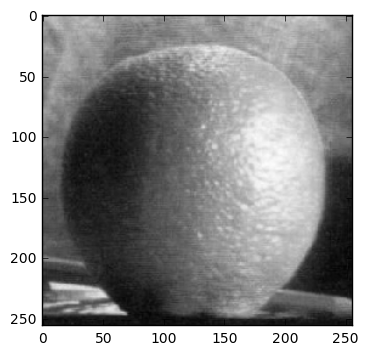

Nearest apple grey resized


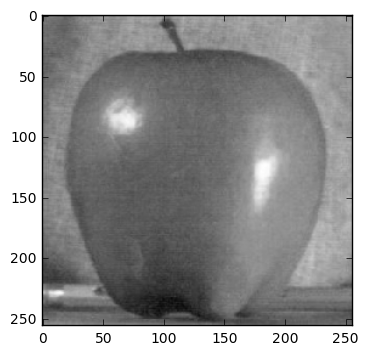

Now simple-blending apple and orange


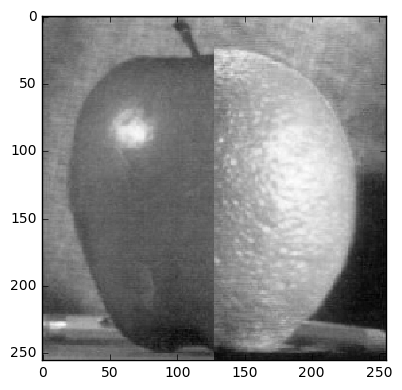

Now alpha-blending apple and orange:


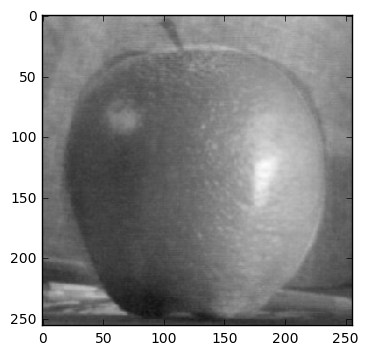

In [16]:
Path = './images/'
image_name = 'orange.jpeg'
orange_im = io.imread(Path.__add__(image_name), as_grey=True)
#plt.figure
#plt.imshow(orange_im, cmap=plt.cm.gray)
#plt.show()



Path = './images/'
image_name = 'apple.jpeg'
apple_im = io.imread(Path.__add__(image_name), as_grey=True)
#plt.figure
#plt.imshow(apple_im, cmap=plt.cm.gray)
#plt.show()

print ('original shapes are:')
print (apple_im.shape)
print (orange_im.shape)


print('  ')
print('  ')

#RESIZING orange and apple
print ('Nearest orange grey resized')
orange_im = misc.imresize(orange_im,(256,256) , interp='nearest',mode = None)
plt.figure
plt.imshow(orange_im, cmap=plt.cm.gray)
plt.show() 

print ('Nearest apple grey resized')
apple_im = misc.imresize(apple_im,(256,256) , interp='nearest',mode = None)
plt.figure
plt.imshow(apple_im, cmap=plt.cm.gray)
plt.show() 


print ('Now simple-blending apple and orange')

or_cop = orange_im.copy()
ap_cop = apple_im.copy()

or_cop[:,:128]=0
ap_cop[:,128:]=0

#plt.figure()
#io.imshow(or_cop)
#plt.figure()
#io.imshow(ap_cop)

simple_blend_apple_orange = or_cop + ap_cop
plt.figure()
io.imshow(simple_blend_apple_orange)




im_orange = Image.fromarray(orange_im, mode='P')
#plt.figure
#plt.imshow(im_orange, cmap=plt.cm.gray)
#plt.show() 

im_apple = Image.fromarray(apple_im, mode='P')
#plt.figure
#plt.imshow(im_apple, cmap=plt.cm.gray)
plt.show() 

print ('Now alpha-blending apple and orange:')
image_blended = Image.blend(im_orange, im_apple, alpha=0.5)
plt.figure
plt.imshow(image_blended, cmap=plt.cm.gray)
plt.show() 

Show the your answers.

Creating the mask:
  
[[ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 ..., 
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]
 [ 1.  1.  1. ...,  0.  0.  0.]]
  
  
    
   
  
Now pyramid-blending apple and orange
  
  


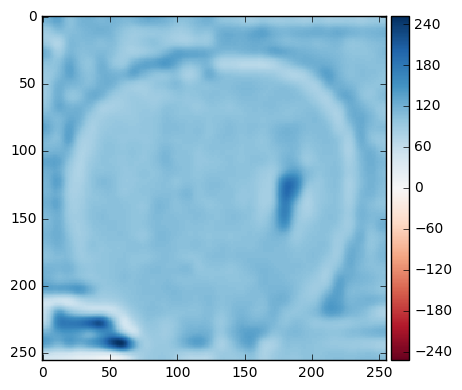

In [18]:
print ('Creating the mask:')
print ('  ')
mask=np.zeros((256,256))
mask[:,:128]=1 #Setting half of the mask to 1 and the other half to 0
print (mask)
mask.size
print('  ')
print('  ')

print('    ')
orange_lap = transform.pyramid_laplacian(im_orange)
orange_lap = list(orange_lap)

print('   ')
apple_lap = transform.pyramid_laplacian(im_apple,downscale=2)
apple_lap = list(apple_lap)

print('  ')
mask_gau = transform.pyramid_gaussian(mask,downscale=2)
mask_gau = list(mask_gau)

print ('Now pyramid-blending apple and orange')

pir_op_level = np.empty(shape=(7,), dtype=object)    #list of objects created
for i in range (0,7):
    pir_op_level[i]=orange_lap[i]*mask_gau[i] + apple_lap[i]*(1-mask_gau[i])


final_collapse=0
for i in range(3,-1,-1):
    new_rescale_and_addition = misc.imresize(pir_op_level[i],(pir_op_level[i-1].shape[0],pir_op_level[i-1].shape[1]) , interp='bilinear',mode = None)
    pir_op_level[i-1]=pir_op_level[i-1]+new_rescale_and_addition
    if (i==0):
        final_collapse=pir_op_level[i]       
plt.figure()
io.imshow(final_collapse)
print('  ')
print('  ')



In [33]:
#The comments are either unsuccesful tryings or optional things, normally plottings of intermediate images
#for me to check that i am going in the good way
